# Extra Credit Notebook: FLY Eagles FLY! or not (?!)
#### Created by: Makena Hillman 12/6/23

### Purpose:
The intention of this notebook is to examine the predictability of the Philadelphia Eagles' success over the years by attempting to answer the following questions: 
- Has their predictability (i.e. sports books' ability to accurately predict their expected game outcome) fluctuated from season to season?
- Are they more/less favored to win based on some other known/unknown factor that isn't purely statistical? i.e. are there any trends in the data that might indicate some sort of bias may have been involved?  
- Generally speaking, are the Eagles a predictable team? i.e. do they perform how they are expected to? 



### Background:

For those who may be unfamiliar with American sports, the NFL, and/or the phenomenon of sports betting, I will start with a quick summary.

The Philadelphia Eagles are an American football team in the National Football League (NFL). They are known for having some of the league's most rowdy and passionate fans, and for being not particularly successful, though not entirely unsuccessful either: they have won one Superbowl championship (2018) and three conference championships (1948,1949,1960). 

Sports betting is a form of gambling that has grown in popularity and legality over the years. Nowadays, there are several sports books (companies that offer betting lines that you can place bets on) around the world. Some of the most popular/successful sports books are those in the United States that have legalized the phenomenon in  <a href="https://www.cbssports.com/general/news/u-s-sports-betting-here-is-where-all-50-states-currently-stand-on-legalizing-online-sports-betting-sites/" target="_blank">a growing number of states</a> such as Draftkings and FanDuel.


# OK Let's Get Started

### Step 0: Setup

In [47]:
import sys

import sqlite3 as db
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

* Python version:
3.8.7 (default, Jan 25 2021, 11:14:52) 
[GCC 5.5.0 20171010]

* sqlite3 version: 2.6.0
* pandas version: 1.4.0


### Step 1: Import the data and take a look

### Data: 
We will leverage a csv containing the final scores and betting line odds of all NFL games played since 2006.
 <a href="http://www.aussportsbetting.com/data/" target="_blank">_Source_</a>

In [3]:
data = pd.read_csv('nfl_lines_data.csv')
data.head(5)

,Date,Home Team,Away Team,Home Score,Away Score,Overtime?,Playoff Game?,Neutral Venue?,Home Odds Open,Home Odds Min,...,Total Score Close,Total Score Over Open,Total Score Over Min,Total Score Over Max,Total Score Over Close,Total Score Under Open,Total Score Under Min,Total Score Under Max,Total Score Under Close,Notes
0,2023-12-04,Jacksonville Jaguars,Cincinnati Bengals,31,34,NaN,NaN,NaN,1.36,1.20,...,41.0,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.91,NaN
1,2023-12-03,Green Bay Packers,Kansas City Chiefs,27,19,NaN,NaN,NaN,3.50,2.90,...,44.0,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.91,NaN
2,2023-12-03,Los Angeles Rams,Cleveland Browns,36,19,NaN,NaN,NaN,1.87,1.45,...,39.5,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.91,NaN
3,2023-12-03,Houston Texans,Denver Broncos,22,17,NaN,NaN,NaN,1.67,1.52,...,47.0,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.91,NaN
4,2023-12-03,Philadelphia Eagles,San Francisco 49ers,19,42,NaN,NaN,NaN,1.71,1.71,...,46.5,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.91,NaN


#### The Data Explained:
The fields we care about to help us answer the questions outlined are the following:
- Date
- Home Team
- Away Team
- Home Score
- Away Score
- Home Odds Open --> The opening predicted decimal odds that the home team will win or lose the game (also referred to as the Moneyline)
- Away Odds Open --> The opening predicted decimal odds that the away team will win the game (also reffered to as the Moneyline)

**Odds (also referred to as the moneyline) explained:**

-100 (minus 100) odds or lower means that the team is favored to win the game. The lower the value, the more favored they are to win. <br>

Ex.) -110 odds = team is barely favored to win; -2000 odds = team is highly favored to win.

Alternately, a team with a moneyline that is +100 (plus 100) or higher is expected to lose the game.

Ex.) + 110 odds = team is barely unfavored to win; +2000 odds = team is highly unfavored to win.




### Step 2: Clean up the data 

Remove the columns we don't need

In [4]:
data = data[['Date', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Home Odds Open', 'Away Odds Open']]
data.head(5)


,Date,Home Team,Away Team,Home Score,Away Score,Home Odds Open,Away Odds Open
0,2023-12-04,Jacksonville Jaguars,Cincinnati Bengals,31,34,1.36,3.30
1,2023-12-03,Green Bay Packers,Kansas City Chiefs,27,19,3.50,1.32
2,2023-12-03,Los Angeles Rams,Cleveland Browns,36,19,1.87,1.95
3,2023-12-03,Houston Texans,Denver Broncos,22,17,1.67,2.30
4,2023-12-03,Philadelphia Eagles,San Francisco 49ers,19,42,1.71,2.20


Rename the columns for consistency

In [5]:
data = data.rename(columns={'Home Team': 'Home_Team',
                           'Away Team': 'Away_Team',
                           'Home Score': 'Home_Score',
                           'Away Score': 'Away_Score',
                           'Home Odds Open': 'Home_Odds',
                           'Away Odds Open': 'Away_Odds'})
data.head(5)

,Date,Home_Team,Away_Team,Home_Score,Away_Score,Home_Odds,Away_Odds
0,2023-12-04,Jacksonville Jaguars,Cincinnati Bengals,31,34,1.36,3.30
1,2023-12-03,Green Bay Packers,Kansas City Chiefs,27,19,3.50,1.32
2,2023-12-03,Los Angeles Rams,Cleveland Browns,36,19,1.87,1.95
3,2023-12-03,Houston Texans,Denver Broncos,22,17,1.67,2.30
4,2023-12-03,Philadelphia Eagles,San Francisco 49ers,19,42,1.71,2.20


Since I only care about the Philadelphia Eagles, let's remove all game records that don't involve them. 

In [14]:
eagles_home = (data['Home_Team'] == "Philadelphia Eagles")
eagles_away = (data['Away_Team'] == "Philadelphia Eagles")
data = data[eagles_home | eagles_away].reset_index(drop= True)

print(f"The Eagles played a total of {len(data)} games since 2006. {len(data[eagles_home])} were played at home in Philly and") 
print(f"{len(data[eagles_away])} were played away. Here are the most recent 5:")
# data.head(5)

The Eagles played a total of 304 games since 2006. 152 were played at home in Philly and
152 were played away. Here are the most recent 5:


For simplicity and readability, let's translate the decimal odds into American odds (as explained above in Step 1)

In [15]:
#perform calculation transformation for odds >= 2.2
data['Home_Odds'] = round(data['Home_Odds'].apply(lambda x: (x -1) * 100 if x >= 2 else x), 2)
data['Away_Odds'] = round(data['Away_Odds'].apply(lambda x: (x -1) * 100 if x >= 2 else x), 2)

#perform calculation for odds < 2
data['Home_Odds'] = round(data['Home_Odds'].apply(lambda x: -100 / (x -1) if x < 2 else x),2)
data['Away_Odds'] = round(data['Away_Odds'].apply(lambda x: -100 / (x -1) if x < 2 else x), 2)


data.head(5)                            

,Date,Home_Team,Away_Team,Home_Score,Away_Score,Home_Odds,Away_Odds
0,2023-12-03,Philadelphia Eagles,San Francisco 49ers,19,42,-140.85,120.0
1,2023-11-26,Philadelphia Eagles,Buffalo Bills,37,34,-185.19,165.0
2,2023-11-20,Kansas City Chiefs,Philadelphia Eagles,17,21,-135.14,115.0
3,2023-11-05,Philadelphia Eagles,Dallas Cowboys,28,23,-158.73,140.0
4,2023-10-29,Washington Commanders,Philadelphia Eagles,31,38,210.00,-250.0


### Step 3: Create columns that will be used to perform the analysis

Create a column that indicates whether the Eagles won or not.

In [16]:
def win_conditions(x):
    if ((x['Home_Team'] == "Philadelphia Eagles") & (x['Home_Score'] > x['Away_Score'])) \
    | ((x['Away_Team'] == "Philadelphia Eagles") & (x['Away_Score'] > x['Home_Score'])):
        return 1
    elif (x['Home_Score'] == x['Away_Score']):
        return "Tie"
    else:
        return 0
    
data['Eagles_Won'] = data.apply(win_conditions, axis=1)

data.head(5)

,Date,Home_Team,Away_Team,Home_Score,Away_Score,Home_Odds,Away_Odds,Eagles_Won
0,2023-12-03,Philadelphia Eagles,San Francisco 49ers,19,42,-140.85,120.0,0
1,2023-11-26,Philadelphia Eagles,Buffalo Bills,37,34,-185.19,165.0,1
2,2023-11-20,Kansas City Chiefs,Philadelphia Eagles,17,21,-135.14,115.0,1
3,2023-11-05,Philadelphia Eagles,Dallas Cowboys,28,23,-158.73,140.0,1
4,2023-10-29,Washington Commanders,Philadelphia Eagles,31,38,210.00,-250.0,1


In [17]:
#test that the ties were assigned properly
ties = (data['Eagles_Won'] == "Tie")
ties = data[ties]
ties

,Date,Home_Team,Away_Team,Home_Score,Away_Score,Home_Odds,Away_Odds,Eagles_Won
63,2020-09-27,Philadelphia Eagles,Cincinnati Bengals,23,23,-294.12,235.0,Tie
260,2008-11-16,Cincinnati Bengals,Philadelphia Eagles,13,13,330.00,-400.0,Tie


**Quick Insight on the two "ties":**

Ties are extremely rare in the NFL as they only occur if there is still no winner after a full overtime period is played. Interesting to see that both the Eagles' ties occurred against the same opponent! Also, they both occurred during games in which the Eagles were favored. 

**Continuing on...**

Create a column that indicates if the Eagles were favored to win or not.

In [18]:
def favored_conditions(s):
    if ((s['Home_Team'] == "Philadelphia Eagles") & (s['Home_Odds'] < -110)) \
    | ((s['Away_Team'] == "Philadelphia Eagles") & (s['Away_Odds'] < -110)):
        return 1
    elif ((s['Home_Team'] == "Philadelphia Eagles") & (s['Home_Odds'] == -110)) \
    | ((s['Away_Team'] == "Philadelphia Eagles") & (s['Away_Odds'] == -110)): 
        return "Even"
    else: 
        return 0
    
data['Eagles_Favored'] = data.apply(favored_conditions, axis=1)

data.head(5)


,Date,Home_Team,Away_Team,Home_Score,Away_Score,Home_Odds,Away_Odds,Eagles_Won,Eagles_Favored
0,2023-12-03,Philadelphia Eagles,San Francisco 49ers,19,42,-140.85,120.0,0,1
1,2023-11-26,Philadelphia Eagles,Buffalo Bills,37,34,-185.19,165.0,1,1
2,2023-11-20,Kansas City Chiefs,Philadelphia Eagles,17,21,-135.14,115.0,1,0
3,2023-11-05,Philadelphia Eagles,Dallas Cowboys,28,23,-158.73,140.0,1,1
4,2023-10-29,Washington Commanders,Philadelphia Eagles,31,38,210.00,-250.0,1,1


In [19]:
#investigate cases with even odds out of curiousity
evens = (data['Eagles_Favored'] == "Even")
evens = data[evens]
evens

,Date,Home_Team,Away_Team,Home_Score,Away_Score,Home_Odds,Away_Odds,Eagles_Won,Eagles_Favored


**Food for thought**

Interesting! The Eagles haven't played a single game since 2006 where they were predicted to have the equivalent likelihood of winning as their opponent, i.e. a "Pick em-game" with 50/50 odds of winning.

This might suggest that perhaps the Eagles aren't a very predictable team according to the stats/algorithms being used by sports books. But can we further validate this? 

**Next... **

Parse out the year from the Date column so that we can easily aggregate the predicatability by football season.

In [20]:
data['Date'] = data['Date'].astype('datetime64[ns]')
data['Year']= data['Date'].dt.year

Create a new column ['Prediction_Correct'] that tells us whether or not the sports book's prediction was accurate (did they win when they were expected to win, or did they lose when they were expected to lose?) 

In [23]:
def predictions(g):
    if (g['Eagles_Won'] == g['Eagles_Favored']): 
        return 1
    else: 
        return 0

In [27]:
data['Prediction_Correct'] = data.apply(predictions, axis=1)
data.head()

,Date,Home_Team,Away_Team,Home_Score,Away_Score,Home_Odds,Away_Odds,Eagles_Won,Eagles_Favored,Year,Prediction_Correct
0,2023-12-03,Philadelphia Eagles,San Francisco 49ers,19,42,-140.85,120.0,0,1,2023,0
1,2023-11-26,Philadelphia Eagles,Buffalo Bills,37,34,-185.19,165.0,1,1,2023,1
2,2023-11-20,Kansas City Chiefs,Philadelphia Eagles,17,21,-135.14,115.0,1,0,2023,0
3,2023-11-05,Philadelphia Eagles,Dallas Cowboys,28,23,-158.73,140.0,1,1,2023,1
4,2023-10-29,Washington Commanders,Philadelphia Eagles,31,38,210.00,-250.0,1,1,2023,1


Finally, refine the final data set to only include what we need for the analysis

In [29]:
final_data = data.copy() 
final_data = final_data.iloc[:, -2:] #want year, predictability score cols
final_data

,Year,Prediction_Correct
0,2023,0
1,2023,1
2,2023,0
3,2023,1
4,2023,1
...,...,...
299,2006,1
300,2006,1
301,2006,1
302,2006,0


In [42]:
print(f"So far this season (it is now December 2023), the Eagles' outcome has been accurately predicted {final_data.loc[(final_data['Year'] == 2023), 'Prediction_Correct'].sum()} times out of {(final_data['Year'] == 2023).count()} games played.")

So far this season (it is now December 2023), the Eagles' outcome has been accurately predicted 12 times out of 18 games played.


### Step 4: Perform Analysis

Create a column that indicates the Eagles predictability factor aggregated at the season level.*

_*I want to know whether each game was predicted correctly or not and we will call this the predictability factor.  For simplicity I will assume that if the prediction matches what the actual outcome of the game was, then the Eagles were predictable for that particular game. In reality, there would probably be several other factors incorporated into this equation to account for or analyze potential non-objective factors such as whether or not they were playing at home._

In [43]:
final_data = final_data.groupby(['Year'], as_index=False).sum(['Prediction_Correct'])
final_data['Predictability(%)'] = final_data['Prediction_Correct'] / len(final_data)
final_data['Predictability(%)'] = round(final_data['Predictability(%)'] * 100, 2)
#final_data['Predictability'] = round(final_data['Predictability'] * 100, 2).astype(str) + '%'
final = final_data.loc[:,["Year", "Predictability(%)"]]
final

,Year,Predictability(%)
0,2006,44.44
1,2007,50.00
2,2008,55.56
3,2009,72.22
4,2010,66.67
5,2011,38.89
6,2012,72.22
7,2013,50.00
8,2014,55.56
9,2015,33.33


Out of curiousity, what is their all-time predictability since 2006?

In [49]:
print(f"Since 2006 the Eagles have been {round(np.mean(final['Predictability(%)']),2)}% predictable. Not bad I suppose. It would be interesting to compare this against the predictability of other teams in the league.")

Since 2006 the Eagles have been 57.41% predictable. Not bad I suppose. It would be interesting to compare this against the predictability of other teams in the league.


### Step 5: Visualize Result

Create a time series graph that shows for each season how predictable the Eagles were using the predictability score (games predicted correct / # of games in the season)

Text(0.5, 1.0, 'Eagles Predictability by Season')

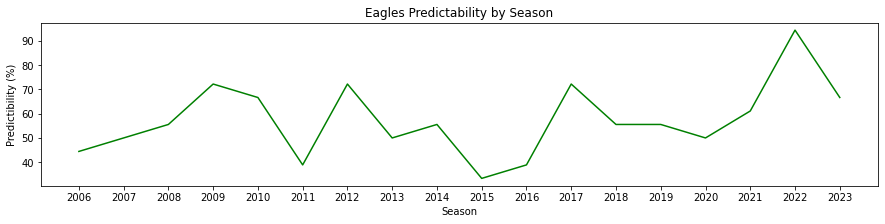

In [46]:
x = final['Year']
y = final['Predictability(%)']

plt.figure(figsize=(15,3))
plt.xticks(x)
plt.plot(x,y, color='g', linestyle='solid')
plt.xlabel("Season")
plt.ylabel("Predictibility (%)")
plt.title(f"Eagles Predictability by Season")

### Conclusion:

**Did it answer my questions? **

Yes, but not as conclusively as I would have hoped. The line graph depicts the fact that the Eagles predictability is sort of all over the place, but this may be the very nature of sports odds in general. We might reasonably conclude that the outlier of 2022 wherein the Eagles were highly predictable is due to it being one of the Eagles most consistently high performing seasons, making it easier to predict their success. On the other hand, they ahve a couple seasons of particular unpredictability, namely in 2011, 2015 and 2016. A <a href="https://www.jt-sw.com/football/pro/teams.nsf/histories/eagles" target="_blank">quick google search</a> would show us that in those seasons, the Eagles record was close to even (meaning they won about as many games as they lost). Thus, it would make sense that those would be difficult games to predict the outcome of.

I was surprised to see that the overall predictability of the team hasn't improved gradually over time due to the very fact that machine learning and other statistical algorithms should be getting better at predicting these outcomes, but that doesn't necessarily seem to be the case.

**A few things I would do differently next time: **
- More visualizations 
- Incorporated more factors from other data sets to improve the concept and accuracy of the "predictability factor"
- Chosen a different sport/team to analyze - one thats less conventional and aligns more with my own personal interests (see sidenote below)
- Perform an additional analysis that investigates their predictability and favorability when they play at home. Using solely the mean we can see that they are typically always favored at home - but how does this correspond to their actual success at home?

_Sidenote: While I am, in fact, a Philadelphia Eagles fan myself, I would have really loved to do this analysis on a less conventional/more globally respected team such as the US womens national soccer team or UCONN womens basketball team. I scoured the web for
this type of open source data, but alas and as expected, it wasn't readily available like this NFL data was. In a world where I had more time to find and scrape such data from online sources, I would have preferred it._




## **Thank you to those who made it this far! Cheers and Go Birds!**